In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Holdout_final.zip

Archive:  /content/drive/MyDrive/Holdout_final.zip
  inflating: Holdout_final/Additional Features_Holdout.csv  
  inflating: Holdout_final/Control Point_Holdout.csv  
  inflating: Holdout_final/Cost & Utilization_Holdout.csv  
  inflating: Holdout_final/Demographics_Holdout.csv  
  inflating: Holdout_final/humana_mays_target_member_conditions_Holdout.csv  
  inflating: Holdout_final/humana_mays_target_member_details_Holdout.csv  
  inflating: Holdout_final/humana_mays_target_member_visit_claims_Holdout.csv  
  inflating: Holdout_final/humana_mays_target_members_Holdout.csv  
  inflating: Holdout_final/MEMBER_DATA_Holdout.csv  
  inflating: Holdout_final/Pharmacy Utilization_Holdout.csv  
  inflating: Holdout_final/QUALITY_DATA_Holdout.csv  
  inflating: Holdout_final/Sales Channel_Holdout.csv  
  inflating: Holdout_final/Social Determinants of Health_Holdout.csv  
  inflating: Holdout_final/Web Activity_Holdout.csv  


In [ ]:
!unzip /content/drive/MyDrive/Training_final.zip

Archive:  /content/drive/MyDrive/Training_final.zip
  inflating: Training_final/Additional Features.csv  
  inflating: Training_final/Control Point.csv  
  inflating: Training_final/Cost & Utilization.csv  
  inflating: Training_final/Demographics.csv  
  inflating: Training_final/humana_mays_target_member_conditions.csv  
  inflating: Training_final/humana_mays_target_member_details.csv  
  inflating: Training_final/humana_mays_target_member_visit_claims.csv  
  inflating: Training_final/humana_mays_target_members.csv  
  inflating: Training_final/MEMBER_DATA.csv  
  inflating: Training_final/Pharmacy Utilization.csv  
  inflating: Training_final/QUALITY_DATA.csv  
  inflating: Training_final/Sales Channel.csv  
  inflating: Training_final/Social Determinants of Health.csv  
  inflating: Training_final/Web Activity.csv  


In [ ]:
# prompt: import LabelEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os

In [ ]:
#Training
#Social Determinants of Health.csv_disabled_ind, Member_Data-lis_ind, Web_Activity-disabled_ind
folder_path = "/content/Training_final"
# Load the feature importance data
# Open the selected_features_mic_filtered.txt file and store features in a list
selected_features=['days_since_last_login', 'login_pmpm_ct', 'login_count_4', 'rwjf_premature_death_rate', 'rwjf_preventable_ip_rate', 'rwjf_teen_births_rate', 'rwjf_poor_phy_hlth_days', 'rwjf_poor_men_hlth_days', 'rwjf_income_inequ_ratio', 'rwjf_std_infect_rate', 'rwjf_population', 'rwjf_median_house_income', 'rwjf_premature_mortality', 'rwjf_injury_deaths_rate', 'rwjf_social_associate_rate', 'rwjf_life_expectancy', 'rwjf_healthcare_cost', 'nonpar_deduct_pmpm_cost', 'nonpar_ds_clm', 'oontwk_ds_clm', 'total_allowed_pmpm_cost', 'total_net_paid_pmpm_cost', 'total_deduct_pmpm_cost', 'cnt_cp_emails_0', 'cnt_cp_emails_1', 'cnt_cp_emails_2', 'cnt_cp_emails_3', 'cnt_cp_emails_4', 'cnt_cp_emails_5', 'cnt_cp_emails_6', 'cnt_cp_emails_7', 'cnt_cp_emails_8', 'cnt_cp_emails_9', 'cnt_cp_emails_10', 'cnt_cp_emails_11', 'cnt_cp_print_1', 'cnt_cp_print_3', 'cnt_cp_print_4', 'cnt_cp_print_5', 'cnt_cp_print_6', 'cnt_cp_print_7', 'cnt_cp_print_8', 'cnt_cp_print_9', 'cnt_cp_print_10', 'cnt_cp_print_11', 'cnt_cp_vat_0', 'cnt_cp_vat_1', 'cnt_cp_vat_2', 'cnt_cp_vat_3', 'cnt_cp_vat_4', 'cnt_cp_vat_5', 'cnt_cp_vat_6', 'cnt_cp_vat_7', 'cnt_cp_vat_8', 'cnt_cp_vat_9', 'cnt_cp_vat_10', 'cnt_cp_vat_11', 'cnt_cp_emails_pmpm_ct', 'cnt_cp_webstatement_pmpm_ct', 'plan_benefit_package_id', 'pbp_segment_id', 'rx_overall_deduct_pmpm_cost', 'rx_overall_gpi_pmpm_ct', 'rx_overall_dist_gpi6_pmpm_ct', 'rx_tier_3_pmpm_ct', 'rx_tier_4_pmpm_ct', 'rx_days_since_last_script', 'riskarr_upside', 'fci_score', 'dcsi_score']



df_tr=pd.read_csv("/content/Training_final/humana_mays_target_members.csv")
l=df_tr['id'].unique()
df_tr=df_tr[['id','preventive_visit_gap_ind']]



rel_id=l

# Load the CSV file in chunks (optional if the file is large)
chunksize = 10000  # specify a suitable chunk size based on your memory capacity


# Read the CSV file in chunks and filter by ids in the list l

prev_df=pd.DataFrame()
for filename in os.listdir(folder_path):

    filtered_rows = []
    print(filename)

    for chunk in pd.read_csv(os.path.join(folder_path, filename), chunksize=chunksize):
        filtered_chunk = chunk[chunk['id'].isin(rel_id)]  # filter rows where id is in list l
        filtered_rows.append(filtered_chunk)

    # Concatenate the filtered chunks into a single DataFrame
    filtered_df = pd.concat(filtered_rows)
    # Remove rows with duplicate id in filtered_df
    filtered_df = filtered_df.drop_duplicates(subset='id')
    print("Filtered df shape: ",filtered_df.shape)

    # Keep only features in filtered_df which belong to selected_features list
    filtered_df = filtered_df[['id'] + [col for col in filtered_df.columns if col in selected_features]]

    if prev_df.empty:
        prev_df=filtered_df
    else:
        prev_df=pd.merge(prev_df,filtered_df,on=['id'],how='inner')
        print("Prev df shape: ",prev_df.shape)


prev_df=pd.merge(prev_df,df_tr,on=['id'],how='inner')
print(prev_df.shape)
# Sample 99238 rows randomly from prev_df

for col in prev_df.columns:
    print("Categorical column-",col)
    le = LabelEncoder()
    prev_df[col] = le.fit_transform(prev_df[col].astype(str))
    # Save the label encoder
    with open(f'label_encoder_{col}.pkl', 'wb') as le_file:
      pickle.dump(le, le_file)




Additional Features.csv
Filtered df shape:  (1527904, 12)
humana_mays_target_member_conditions.csv
Filtered df shape:  (1152178, 7)
Prev df shape:  (1152178, 3)
Demographics.csv
Filtered df shape:  (1527904, 7)
Prev df shape:  (1152178, 4)
humana_mays_target_members.csv
Filtered df shape:  (1527904, 5)
Prev df shape:  (1152178, 4)
QUALITY_DATA.csv
Filtered df shape:  (1350479, 8)
Prev df shape:  (1057706, 4)
Sales Channel.csv
Filtered df shape:  (1527904, 2)
Prev df shape:  (1057706, 4)
Pharmacy Utilization.csv
Filtered df shape:  (1527904, 17)
Prev df shape:  (1057706, 10)
Web Activity.csv
Filtered df shape:  (1527904, 15)
Prev df shape:  (1057706, 13)
humana_mays_target_member_details.csv
Filtered df shape:  (1527904, 13)
Prev df shape:  (1057706, 15)
Social Determinants of Health.csv
Filtered df shape:  (1527904, 78)
Prev df shape:  (1057706, 29)
Control Point.csv
Filtered df shape:  (1527904, 66)
Prev df shape:  (1057706, 65)
MEMBER_DATA.csv
Filtered df shape:  (1527904, 7)
Prev df

NameError: name 'pickle' is not defined

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import os
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import LabelEncoder

In [ ]:
# prompt: import standard scalar

from sklearn.preprocessing import StandardScaler



In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np


# Prepare the data

y = prev_df['preventive_visit_gap_ind']
X = prev_df.drop(columns=['id','preventive_visit_gap_ind'])

scaler = StandardScaler()

# Fit and transform the DataFrame
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Print all unique values in y and the number of rows having them
unique_values = y.value_counts()
print("Unique values in y and their counts:")
print(unique_values)



Unique values in y and their counts:
preventive_visit_gap_ind
0    597680
1    394703
Name: count, dtype: int64


In [ ]:
# Print all unique values in y and the number of rows having them
unique_values = y.value_counts()
print("Unique values in y and their counts:")
print(unique_values)

Unique values in y and their counts:
preventive_visit_gap_ind
0    597680
1    394703
Name: count, dtype: int64


In [ ]:
model = xgb.XGBClassifier(gamma=0.4,n_estimators=400)

model.fit(X,y)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
import lightgbm as lgb

lgbm_clf = lgb.LGBMClassifier(
    boosting_type='gbdt',    # Gradient boosting decision tree
    num_leaves=80,           # Maximum tree leaves for base learners
    max_depth=8,            # Maximum depth of the tree (-1 means no limit)
    learning_rate=0.05,      # Learning rate
    n_estimators=300,
    min_data_in_leaf=40,# Number of boosting iterations (trees)
    objective='binary',      # Objective function (binary classification)
    subsample=0.8,           # Fraction of data used for training each tree
    colsample_bytree=0.8,    # Fraction of features used for each tree
    reg_lambda=0.1,          # L2 regularization term
    random_state=42          # Random seed for reproducibility
)

lgbm_clf.fit(X,y)


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Info] Number of positive: 394703, number of negative: 597680
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.361320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8305
[LightGBM] [Info] Number of data points in the train set: 992383, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397733 -> initscore=-0.414922
[LightGBM] [Info] Start training from score -0.414922


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=8,
               min_data_in_leaf=40, n_estimators=300, num_leaves=80,
               objective='binary', random_state=42, reg_lambda=0.1,
               subsample=0.8)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import os
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

folder_path = "/content/Holdout_final"  # Replace with your folder path


# Read selected_features.txt and store all the strings in a list

selected_features=['days_since_last_login', 'login_pmpm_ct', 'login_count_4', 'rwjf_premature_death_rate', 'rwjf_preventable_ip_rate', 'rwjf_teen_births_rate', 'rwjf_poor_phy_hlth_days', 'rwjf_poor_men_hlth_days', 'rwjf_income_inequ_ratio', 'rwjf_std_infect_rate', 'rwjf_population', 'rwjf_median_house_income', 'rwjf_premature_mortality', 'rwjf_injury_deaths_rate', 'rwjf_social_associate_rate', 'rwjf_life_expectancy', 'rwjf_healthcare_cost', 'nonpar_deduct_pmpm_cost', 'nonpar_ds_clm', 'oontwk_ds_clm', 'total_allowed_pmpm_cost', 'total_net_paid_pmpm_cost', 'total_deduct_pmpm_cost', 'cnt_cp_emails_0', 'cnt_cp_emails_1', 'cnt_cp_emails_2', 'cnt_cp_emails_3', 'cnt_cp_emails_4', 'cnt_cp_emails_5', 'cnt_cp_emails_6', 'cnt_cp_emails_7', 'cnt_cp_emails_8', 'cnt_cp_emails_9', 'cnt_cp_emails_10', 'cnt_cp_emails_11', 'cnt_cp_print_1', 'cnt_cp_print_3', 'cnt_cp_print_4', 'cnt_cp_print_5', 'cnt_cp_print_6', 'cnt_cp_print_7', 'cnt_cp_print_8', 'cnt_cp_print_9', 'cnt_cp_print_10', 'cnt_cp_print_11', 'cnt_cp_vat_0', 'cnt_cp_vat_1', 'cnt_cp_vat_2', 'cnt_cp_vat_3', 'cnt_cp_vat_4', 'cnt_cp_vat_5', 'cnt_cp_vat_6', 'cnt_cp_vat_7', 'cnt_cp_vat_8', 'cnt_cp_vat_9', 'cnt_cp_vat_10', 'cnt_cp_vat_11', 'cnt_cp_emails_pmpm_ct', 'cnt_cp_webstatement_pmpm_ct', 'plan_benefit_package_id', 'pbp_segment_id', 'rx_overall_deduct_pmpm_cost', 'rx_overall_gpi_pmpm_ct', 'rx_overall_dist_gpi6_pmpm_ct', 'rx_tier_3_pmpm_ct', 'rx_tier_4_pmpm_ct', 'rx_days_since_last_script', 'riskarr_upside', 'fci_score', 'dcsi_score']

#print(selected_features)
c=0
for filename in os.listdir(folder_path):
  if filename.endswith(".csv"):
    print(c)
    print(filename)
    df=pd.read_csv(os.path.join(folder_path, filename))
    for col in df.columns:
        if not pd.api.types.is_numeric_dtype(df[col]):

            df = df.drop(col, axis=1)
    df=df.drop_duplicates(subset='id')
    #print(df.shape)
    # Drop all the features from df that do not lie in selected_features list
    #df = df[['id'] + [col for col in df.columns if col in selected_features]]

    if c==0:
        prev_df=df
    else:
        prev_df=pd.merge(prev_df, df, on='id', how='outer')


    del df
    c+=1

import pickle


# Load the saved XGBoost model from the pickle file
"""
model_filename = '/content/xgboost_model_3.pkl'

#print(len(prev_df.columns)==len(selected_features))

with open(model_filename, 'rb') as file:
    model = pickle.load(file)
"""
# Ensure 'id' column is not used for predictions
X_holdout = prev_df.drop(columns=['id'])
X_holdout = X_holdout[model.feature_names_in_]

scaler = StandardScaler()

 # Fit and transform the DataFrame
X_holdout = pd.DataFrame(scaler.fit_transform(X_holdout), columns=X_holdout.columns)

# Make predictions using the loaded model


0
humana_mays_target_member_visit_claims_Holdout.csv


<ipython-input-16-a38ce9027f46>:28: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(os.path.join(folder_path, filename))


1
Demographics_Holdout.csv
2
MEMBER_DATA_Holdout.csv
3
Social Determinants of Health_Holdout.csv
4
Additional Features_Holdout.csv
5
Sales Channel_Holdout.csv
6
humana_mays_target_member_details_Holdout.csv
7
QUALITY_DATA_Holdout.csv


<ipython-input-16-a38ce9027f46>:28: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(os.path.join(folder_path, filename))


8
humana_mays_target_member_conditions_Holdout.csv
9
Cost & Utilization_Holdout.csv
10
Control Point_Holdout.csv
11
Web Activity_Holdout.csv
12
Pharmacy Utilization_Holdout.csv
13
humana_mays_target_members_Holdout.csv


In [ ]:
y_prob = model.predict_proba(X_holdout)[:, 1]

# Add predictions to the DataFrame
prev_df['SCORE'] = y_prob

# Create an additional column RANK based on prev_df['SCORE']
prev_df['RANK'] = prev_df['SCORE'].rank(ascending=False, method='first').astype(int)

final_sub=prev_df[['id','RANK','SCORE']]
#del prev_df
# Save the DataFrame with predictions to a new CSV file
output_filename = '2024CaseCompetition_Shreya_Jain_20241011.csv'

final_sub.to_csv(output_filename, index=False)

print(f"Predictions saved to '{output_filename}'")

import os

if not os.path.isfile(output_filename):
    final_sub.to_csv(output_filename, index=False)
else:
    final_sub.to_csv(output_filename, mode='a', header=False, index=False)


Predictions saved to '2024CaseCompetition_Shreya_Jain_20241011.csv'


In [ ]:
final_sub.shape

(381976, 3)

<ipython-input-19-50e8f3882760>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_sub['SCORE'], shade=True)
<ipython-input-19-50e8f3882760>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_sub['SCORE'], shade=True)


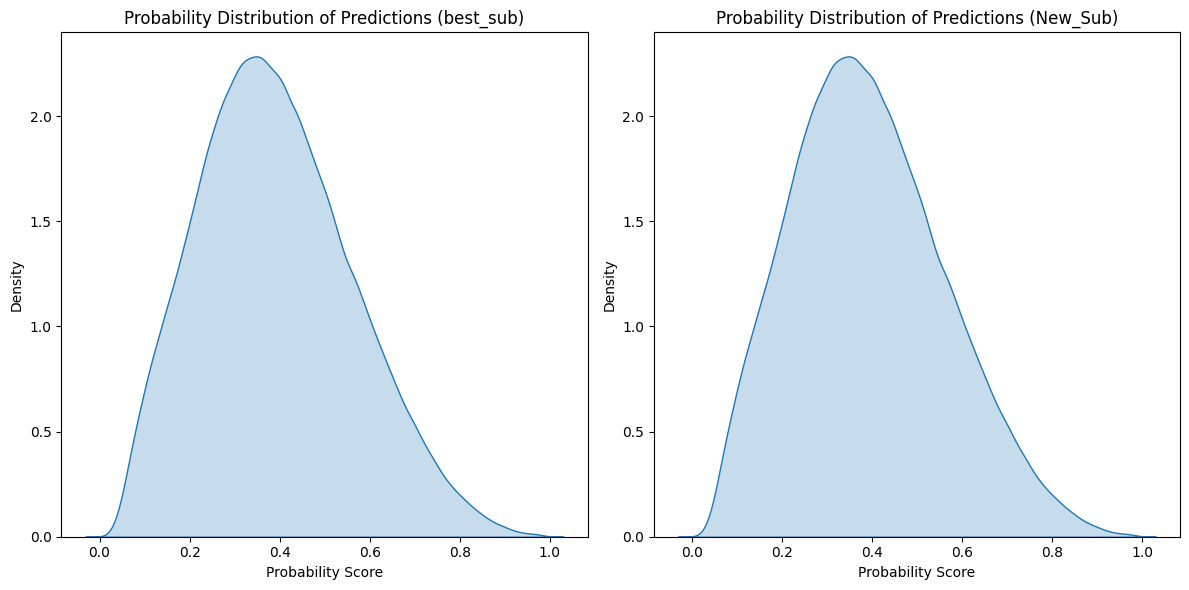

In [ ]:
# prompt: plot kdeplot of df['SCORE'] and df1['SCORE'] side by side

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df and df1 are your dataframes with 'SCORE' column
#df=pd.read_csv("/content/2024CaseCompetition_Shreya_Jain_20241009.csv")
#df1=pd.read_csv("/content/2024CaseCompetition_Shreya_Jain_20241011_1.csv")

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

plt.subplot(1, 2, 1)  # Create the first subplot (left)
sns.kdeplot(final_sub['SCORE'], shade=True)
plt.title('Probability Distribution of Predictions (best_sub)')
plt.xlabel('Probability Score')
plt.ylabel('Density')

plt.subplot(1, 2, 2)  # Create the second subplot (right)
sns.kdeplot(final_sub['SCORE'], shade=True)
plt.title('Probability Distribution of Predictions (New_Sub)')
plt.xlabel('Probability Score')
plt.ylabel('Density')

plt.tight_layout()  # Adjust subplot spacing
plt.show()


<Axes: ylabel='Density'>

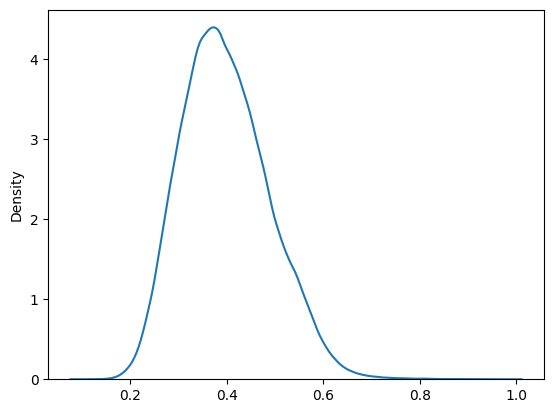

In [ ]:
sns.kdeplot(y_prob)

In [ ]:
nan_columns = prev_df.columns[prev_df.isna().any()].tolist()
print(len(nan_columns))

231


In [ ]:
# prompt: for each column in prev_df find percentage and no.of missing values
l=[]
c=0
for column in prev_df.columns:
  missing_count = prev_df[column].isnull().sum()
  missing_percentage = (missing_count / len(prev_df)) * 100

  if missing_percentage>0.5:
    print(f"Column: {column}")
    print(f"Number of missing values: {missing_count}")
    print(f"Percentage of missing values: {missing_percentage:.2f}%")
    print("-" * 20)
    l.append(column)
    c+=1

print(c)



In [ ]:
# prompt: save l into text file

with open('nan_columns.txt', 'w') as f:
  for item in l:
    f.write("%s\n" % item)


In [ ]:
# prompt: display all column in pandas maximum width

pd.set_option('display.max_colwidth', None)


In [ ]:
import pandas as pd

df=pd.read_csv("/content/Holdout_final/humana_mays_target_member_conditions_Holdout.csv",nrows=100)

df=df[['membership_year','id']]

#df.drop_duplicates(subset='id',inplace=True)

df.shape

(100, 2)

In [ ]:
humana_mays_target_member_conditions_Holdout.csv

humana_mays_target_member_visit_claims_Holdout.csv

Web Activity_Holdout.csv

MEMBER_DATA_Holdout.csv

In [ ]:
import os
folder_path = "/content/Holdout_final"
c=0
for filename in os.listdir(folder_path):
  if filename.endswith(".csv"):
    print(c)
    print(filename)
    c+=1


0
Sales Channel_Holdout.csv
1
Cost & Utilization_Holdout.csv
2
humana_mays_target_member_details_Holdout.csv
3
humana_mays_target_members_Holdout.csv
4
Control Point_Holdout.csv
5
Demographics_Holdout.csv
6
Additional Features_Holdout.csv
7
Social Determinants of Health_Holdout.csv
8
humana_mays_target_member_conditions_Holdout.csv
9
humana_mays_target_member_visit_claims_Holdout.csv
10
Pharmacy Utilization_Holdout.csv
11
Web Activity_Holdout.csv
12
MEMBER_DATA_Holdout.csv


In [ ]:
# prompt: Open 2024Case csv file

import pandas as pd

df = pd.read_csv('/content/2024CaseCompetition_Shreya_Jain_20241006.csv')
print(df.head())


      id      RANK     SCORE
0  46388  11859276  0.123064
1  46388  11859277  0.123064
2  46388  11859278  0.123064
3  46388  11859279  0.123064
4  46388  11859280  0.123064


In [ ]:
# prompt: Check if df['id'] and pev_df['id'] contain same values

# Assuming 'prev_df' is still available in your environment from the previous code.
# If not, you'll need to load it or recreate it.

# Check if the 'id' columns have the same values, ignoring order
if set(df['id']) == set(prev_df['id']):
  print("Both DataFrames have the same 'id' values.")
else:
  print("The 'id' values are different between the DataFrames.")

# Optionally, you can also check for exact matches, considering order
# if df['id'].equals(prev_df['id']):
#   print("The 'id' columns are exactly the same.")
# else:
#   print("The 'id' columns are not exactly the same.")


The 'id' values are different between the DataFrames.


In [ ]:
# prompt: find columns with nan values in prev_df

nan_columns = prev_df.columns[prev_df.isna().any()].tolist()
print(len(nan_columns))


269


In [ ]:
c=0
for i in df['id'].tolist():
  f=0
  if c%10000==0:
    print(c)
  for j in final_sub['id'].tolist():
    if i==j:
      f=1
      break
  if f==0:
    print(i)
  c+=1

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000


In [ ]:
# prompt: Impute missing value in column by mean

# Assuming 'prev_df' is your DataFrame and 'column_name' is the column with missing values
column_name = 'your_column_name'  # Replace with the actual column name

# Calculate the mean of the column, excluding missing values
mean_value = prev_df[column_name].mean()

# Fill missing values with the calculated mean
prev_df[column_name].fillna(mean_value, inplace=True)


In [ ]:
# prompt: Impute missing value in column by mode

# Assuming 'prev_df' is your DataFrame and 'column_name' is the column with missing values
column_name = 'your_column_name'  # Replace with the actual column name

# Calculate the mode of the column, excluding missing values
mode_value = prev_df[column_name].mode()[0]

# Fill missing values with the calculated mode
prev_df[column_name].fillna(mode_value, inplace=True)


In [ ]:
final_sub.columns

Index(['id', 'RANK', 'SCORE'], dtype='object')

In [ ]:
final_sub.shape

(381976, 3)

In [ ]:
df=pd.read_csv("/content/Holdout_final/Control Point_Holdout.csv")
df.shape

(381976, 66)

In [ ]:
final_sub.shape

(381976, 3)

In [ ]:
import pickle


# Load the saved XGBoost model from the pickle file
model_filename = '/content/drive/MyDrive/xgboost_model_2.pkl'

#print(len(prev_df.columns)==len(selected_features))

with open(model_filename, 'rb') as file:
    model = pickle.load(file)


In [ ]:
# prompt: print input features of model

print(list(model.feature_names_in_))


['days_since_last_login', 'login_pmpm_ct', 'login_count_4', 'rwjf_premature_death_rate', 'rwjf_preventable_ip_rate', 'rwjf_teen_births_rate', 'rwjf_poor_phy_hlth_days', 'rwjf_poor_men_hlth_days', 'rwjf_income_inequ_ratio', 'rwjf_std_infect_rate', 'rwjf_population', 'rwjf_median_house_income', 'rwjf_premature_mortality', 'rwjf_injury_deaths_rate', 'rwjf_social_associate_rate', 'rwjf_life_expectancy', 'rwjf_healthcare_cost', 'nonpar_deduct_pmpm_cost', 'nonpar_ds_clm', 'oontwk_ds_clm', 'total_allowed_pmpm_cost', 'total_net_paid_pmpm_cost', 'total_deduct_pmpm_cost', 'cnt_cp_emails_0', 'cnt_cp_emails_1', 'cnt_cp_emails_2', 'cnt_cp_emails_3', 'cnt_cp_emails_4', 'cnt_cp_emails_5', 'cnt_cp_emails_6', 'cnt_cp_emails_7', 'cnt_cp_emails_8', 'cnt_cp_emails_9', 'cnt_cp_emails_10', 'cnt_cp_emails_11', 'cnt_cp_print_1', 'cnt_cp_print_3', 'cnt_cp_print_4', 'cnt_cp_print_5', 'cnt_cp_print_6', 'cnt_cp_print_7', 'cnt_cp_print_8', 'cnt_cp_print_9', 'cnt_cp_print_10', 'cnt_cp_print_11', 'cnt_cp_vat_0', 'cn

In [ ]:
# prompt: print parameter of model

print(model.get_params())


{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'auc', 'feature_types': None, 'gamma': 0.4, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-10-f0e391f576af>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SCORE'], shade=True)
<ipython-input-10-f0e391f576af>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['SCORE'], shade=True)


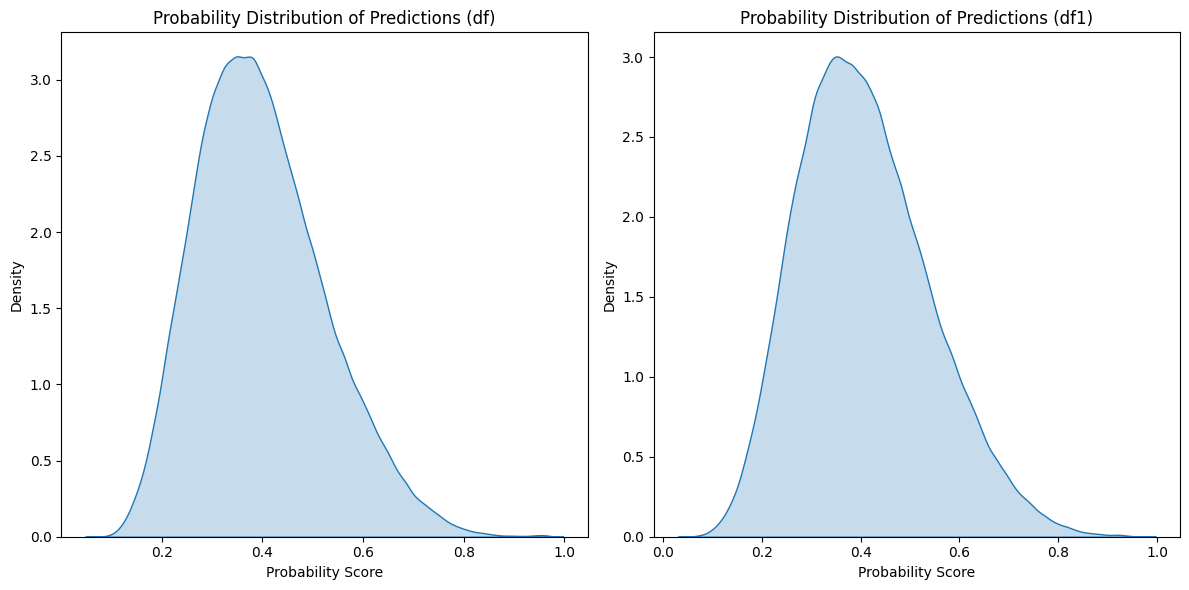

In [ ]:
# prompt: plot kdeplot of df['SCORE'] and df1['SCORE'] side by side

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df and df1 are your dataframes with 'SCORE' column
df=pd.read_csv("/content/d1.csv")
df1=pd.read_csv("/content/2024CaseCompetition_Shreya_Jain_20241011.csv")

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

plt.subplot(1, 2, 1)  # Create the first subplot (left)
sns.kdeplot(df['SCORE'], shade=True)
plt.title('Probability Distribution of Predictions (df)')
plt.xlabel('Probability Score')
plt.ylabel('Density')

plt.subplot(1, 2, 2)  # Create the second subplot (right)
sns.kdeplot(df1['SCORE'], shade=True)
plt.title('Probability Distribution of Predictions (df1)')
plt.xlabel('Probability Score')
plt.ylabel('Density')

plt.tight_layout()  # Adjust subplot spacing
plt.show()


<ipython-input-5-1fefd52d21b5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SCORE'], shade=True)


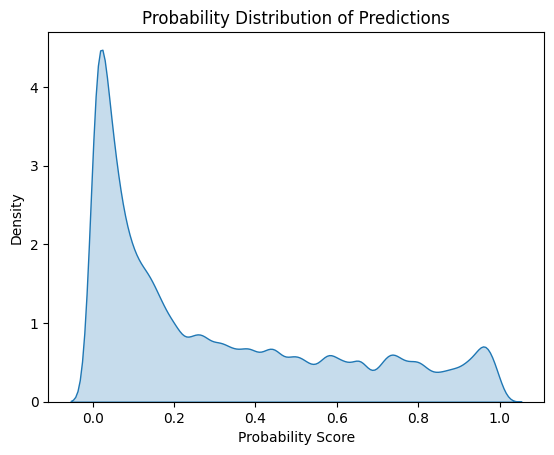

In [ ]:
df=pd.read_csv("/content/2024CaseCompetition_Shreya_Jain_20241006.csv")
# Assuming df is your dataframe and 'score' is the column with probability predictions
sns.kdeplot(df['SCORE'], shade=True)
plt.title('Probability Distribution of Predictions')
plt.xlabel('Probability Score')
plt.ylabel('Density')
plt.show()

<ipython-input-7-bdb2a504a209>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SCORE'], shade=True)


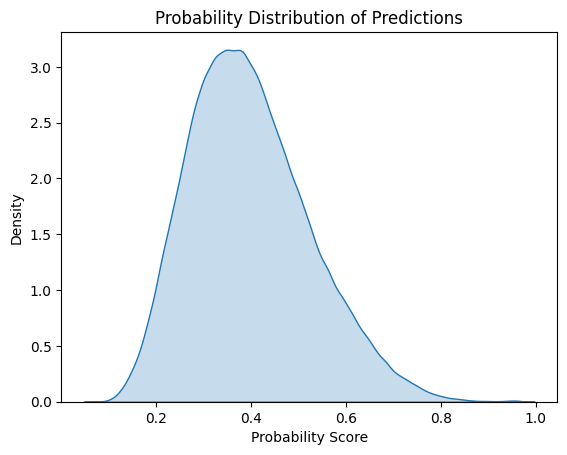

In [ ]:
df=pd.read_csv("d1.csv")
# Assuming df is your dataframe and 'score' is the column with probability predictions
sns.kdeplot(df['SCORE'], shade=True)
plt.title('Probability Distribution of Predictions')
plt.xlabel('Probability Score')
plt.ylabel('Density')
plt.show()

In [ ]:
df=pd.read_csv("/content/2024CaseCompetition_Shreya_Jain_20241009.csv")
df1=pd.read_csv("/content/2024CaseCompetition_Shreya_Jain_20241010.csv")




In [ ]:
# prompt: for same id , take average of df['SCORE'] and df1['SCORE']

# Merge the two DataFrames on the 'id' column
merged_df = pd.merge(df, df1, on='id', how='inner', suffixes=('_df', '_df1'))

# Calculate the average score for each 'id'
merged_df['Average_Score'] = (merged_df['SCORE_df'] + merged_df['SCORE_df1']) / 2

# Create a new DataFrame with 'id' and 'Average_Score'
average_score_df = merged_df[['id', 'Average_Score']]

print(average_score_df)


              id  Average_Score
0              5       0.370465
1              5       0.370465
2              9       0.443799
3              9       0.443799
4             11       0.326328
...          ...            ...
1527899  1999976       0.296741
1527900  1999993       0.217579
1527901  1999993       0.217579
1527902  1999999       0.316048
1527903  1999999       0.316048

[1527904 rows x 2 columns]


<ipython-input-19-93ab8f14c01c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(merged_df['Average_Score'], shade=True)


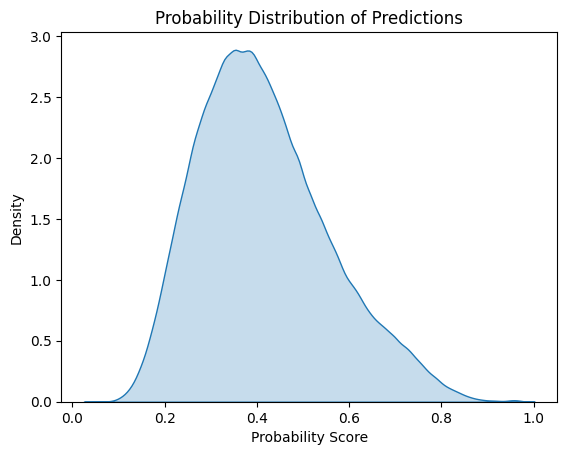

In [ ]:
sns.kdeplot(merged_df['Average_Score'], shade=True)
plt.title('Probability Distribution of Predictions')
plt.xlabel('Probability Score')
plt.ylabel('Density')
plt.show()

Feature Importance:


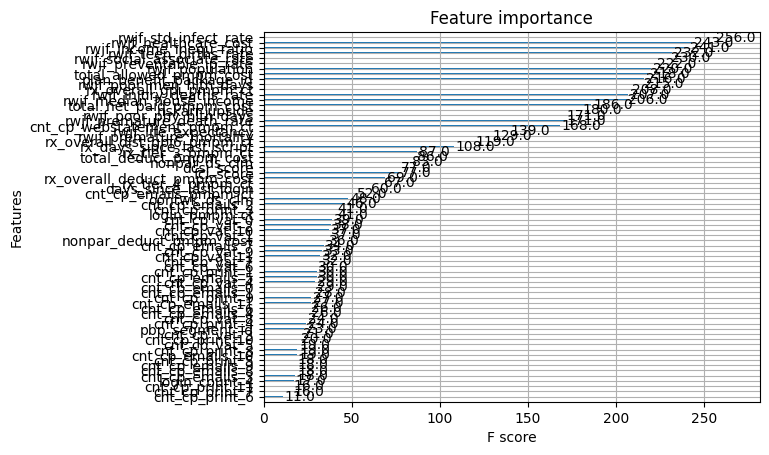

In [ ]:
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the XGBoost model from the pickle file
with open('/content/drive/MyDrive/xgboost_model_2.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

# Access feature importance from the booster object
booster = xgb_model.get_booster()

# Get feature importance as a dictionary
feature_importance = booster.get_score(importance_type='weight')

# Print feature importance
print("Feature Importance:")
d={}
for feature, importance in feature_importance.items():
    #print(f"{feature}: {importance}")
    d[feature]=importance

# Optionally, you can plot the feature importance
xgb.plot_importance(xgb_model)
plt.show()


In [ ]:
# prompt: list all features in xgboost model

print(len(xgb_model.feature_names_in_))


70


In [ ]:
# prompt: print d in descending order according to importance

import operator

c=0
l=[]
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1), reverse=True))
for feature, importance in sorted_d.items():
  if c<=36:
    print(f"{feature}: {importance}")
    c+=1
    l.append(feature)


rwjf_std_infect_rate: 256.0
rwjf_healthcare_cost: 243.0
rwjf_income_inequ_ratio: 241.0
rwjf_teen_births_rate: 232.0
rwjf_social_associate_rate: 230.0
rwjf_preventable_ip_rate: 222.0
rwjf_population: 220.0
total_allowed_pmpm_cost: 218.0
plan_benefit_package_id: 216.0
rwjf_poor_men_hlth_days: 215.0
rx_overall_gpi_pmpm_ct: 208.0
rwjf_injury_deaths_rate: 207.0
rwjf_median_house_income: 206.0
total_net_paid_pmpm_cost: 186.0
riskarr_upside: 180.0
rwjf_premature_death_rate: 171.0
rwjf_poor_phy_hlth_days: 171.0
cnt_cp_webstatement_pmpm_ct: 168.0
rwjf_life_expectancy: 139.0
rwjf_premature_mortality: 129.0
rx_overall_dist_gpi6_pmpm_ct: 119.0
rx_days_since_last_script: 108.0
rx_tier_3_pmpm_ct: 87.0
total_deduct_pmpm_cost: 86.0
nonpar_ds_clm: 83.0
fci_score: 77.0
dcsi_score: 77.0
rx_overall_deduct_pmpm_cost: 69.0
rx_tier_4_pmpm_ct: 67.0
days_since_last_login: 60.0
cnt_cp_emails_pmpm_ct: 52.0
oontwk_ds_clm: 48.0
cnt_cp_emails_2: 46.0
login_pmpm_ct: 41.0
cnt_cp_print_3: 41.0
cnt_cp_vat_0: 39.0
cnt_c

In [ ]:
l

['rwjf_std_infect_rate',
 'rwjf_healthcare_cost',
 'rwjf_income_inequ_ratio',
 'rwjf_teen_births_rate',
 'rwjf_social_associate_rate',
 'rwjf_preventable_ip_rate',
 'rwjf_population',
 'total_allowed_pmpm_cost',
 'plan_benefit_package_id',
 'rwjf_poor_men_hlth_days',
 'rx_overall_gpi_pmpm_ct',
 'rwjf_injury_deaths_rate',
 'rwjf_median_house_income',
 'total_net_paid_pmpm_cost',
 'riskarr_upside',
 'rwjf_premature_death_rate',
 'rwjf_poor_phy_hlth_days',
 'cnt_cp_webstatement_pmpm_ct',
 'rwjf_life_expectancy',
 'rwjf_premature_mortality',
 'rx_overall_dist_gpi6_pmpm_ct',
 'rx_days_since_last_script',
 'rx_tier_3_pmpm_ct',
 'total_deduct_pmpm_cost',
 'nonpar_ds_clm',
 'fci_score',
 'dcsi_score',
 'rx_overall_deduct_pmpm_cost',
 'rx_tier_4_pmpm_ct',
 'days_since_last_login',
 'cnt_cp_emails_pmpm_ct',
 'oontwk_ds_clm',
 'cnt_cp_emails_2',
 'login_pmpm_ct',
 'cnt_cp_print_3',
 'cnt_cp_vat_0',
 'cnt_cp_vat_2']